###### Target is a globally recognized brand and a leading retailers in the United Stated . Known for offering extantional value, inspiration , innovotion, and a unique shopping experience. this dataset focuses on target's oprations in Brazil, covering 100000 orders placed between 2016 and 2018. It includes detailed information on order status pricing payments and shipping performance customer locations product attributer and customer reviews.

In [81]:
import pandas as pd
import numpy as np
import mysql.connector
import os

In [82]:
import seaborn as sns

In [3]:
# list of CSV files and their corresponding tab
'''dataset = [
    ('customers.csv', 'customer'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items')
]'''

"dataset = [\n    ('customers.csv', 'customer'),\n    ('orders.csv', 'orders'),\n    ('sellers.csv', 'sellers'),\n    ('products.csv', 'products'),\n    ('payments.csv', 'payments'),\n    ('geolocation.csv', 'geolocation'),\n    ('order_items.csv', 'order_items')\n]"

In [4]:
conn = mysql.connector.connect(
       host = "localhost",
       user = "root",
       password = "root",
       database = "eccomers",
       auth_plugin = "mysql_native_password"
) 

In [5]:
cursor = conn.cursor()
#folder_path = 'C:/Users/admin/Desktop/Data Set/ecommerce'

In [6]:
'''def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for dataset, table_name in dataset:
    file_path = os.path.join(folder_path, dataset)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {dataset}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()'''

'def get_sql_type(dtype):\n    if pd.api.types.is_integer_dtype(dtype):\n        return \'INT\'\n    elif pd.api.types.is_float_dtype(dtype):\n        return \'FLOAT\'\n    elif pd.api.types.is_bool_dtype(dtype):\n        return \'BOOLEAN\'\n    elif pd.api.types.is_datetime64_any_dtype(dtype):\n        return \'DATETIME\'\n    else:\n        return \'TEXT\'\n\nfor dataset, table_name in dataset:\n    file_path = os.path.join(folder_path, dataset)\n    \n    # Read the CSV file into a pandas DataFrame\n    df = pd.read_csv(file_path)\n    \n    # Replace NaN with None to handle SQL NULL\n    df = df.where(pd.notnull(df), None)\n    \n    # Debugging: Check for NaN values\n    print(f"Processing {dataset}")\n    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")\n\n    # Clean column names\n    df.columns = [col.replace(\' \', \'_\').replace(\'-\', \'_\').replace(\'.\', \'_\') for col in df.columns]\n\n    # Generate the CREATE TABLE statement with appropriate data types\n 

# Basic Queries

# 1. List all unique cities where customers are located.

In [7]:
query = """select distinct customer_city from customer"""
cursor.execute(query)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [9]:
query1 = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cursor.execute(query1)
data1 = cursor.fetchall()
print("Total order place in 2017 are",data1[0][0])

Total order place in 2017 are 45101


# 3. Find the total sales per category.

In [11]:
query = """select distinct product_category from products"""

cursor.execute(query)
data = cursor.fetchall()
data

[('perfumery',),
 ('Art',),
 ('sport leisure',),
 ('babies',),
 ('housewares',),
 ('musical instruments',),
 ('Cool Stuff',),
 ('Furniture Decoration',),
 ('home appliances',),
 ('toys',),
 ('bed table bath',),
 ('CONSTRUCTION SECURITY TOOLS',),
 ('computer accessories',),
 ('HEALTH BEAUTY',),
 ('Bags Accessories',),
 ('Garden tools',),
 ('Furniture office',),
 ('automotive',),
 ('electronics',),
 ('Fashion Calcados',),
 ('telephony',),
 ('stationary store',),
 ('Fashion Bags and Accessories',),
 ('PCs',),
 ('Casa Construcao',),
 ('Watches present',),
 ('Construction Tools Construction',),
 ('pet Shop',),
 ('electrostile',),
 ('Agro Industria e Comercio',),
 (None,),
 ('Room Furniture',),
 ('SIGNALIZATION AND SAFETY',),
 ('climatization',),
 ('Games consoles',),
 ('General Interest Books',),
 ('Construction Tools Tools',),
 ('Fashion Underwear and Beach Fashion',),
 ("Fashion Men's Clothing",),
 ('Furniture Kitchen Service Area Dinner and Garden',),
 ('Industry Commerce and Business',)

In [17]:
query2 = '''SELECT 
    upper(product_category), round(SUM(price),2)
FROM
    productsx 
        JOIN
    order_items AS orders ON orders.product_id = products.product_id
GROUP BY product_category'''

cursor.execute(query2)
data2 = cursor.fetchall()
df= pd.DataFrame(data2, columns = ["category", "sales"])
df

,category,sales
0,HEALTH BEAUTY,1258681.34
1,SPORT LEISURE,988048.97
2,COOL STUFF,635290.85
3,COMPUTER ACCESSORIES,911954.32
4,WATCHES PRESENT,1205005.68
...,...,...
69,FLOWERS,1110.04
70,KITCHEN PORTABLE AND FOOD COACH,3968.53
71,HOUSE COMFORT 2,760.27
72,CITTE AND UPHACK FURNITURE,4368.08


# 4. Calculate the percentage of orders that were paid in installments.

In [18]:
query2 = '''select sum(case when payment_installments >=1 
            then 1 else 0 end) / count(*) *100 from payments
'''

cursor.execute(query2)
data2 = cursor.fetchall()
"percentage of orders that were paid in installments is",data2[0][0]

('percentage of orders that were paid in installments is', Decimal('99.9981'))

# 5. Count the number of customers from each state. 

In [19]:
query2 = '''select customer_state, count(customer_id) as count_of_customer from customer group by customer_state;'''

cursor.execute(query2)
data2 = cursor.fetchall()
#"Count the number of customers from each state are ",data2
df = pd.DataFrame(data2, columns = ["state","customer_count"])
df = df.sort_values(by = "customer_count" , ascending= False)

<function matplotlib.pyplot.show(close=None, block=None)>

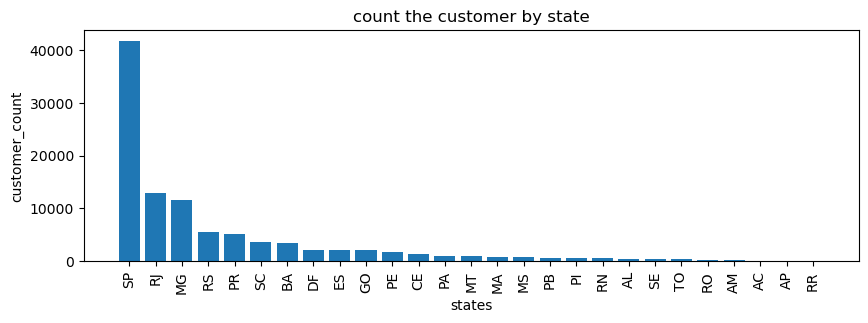

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize= (10,3))
plt.bar(df["state"], df["customer_count"])
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count the customer by state")
plt.xticks(rotation = 90)
plt.show

# Intermediate Queries

# 1. Calculate the number of orders per month in 2018.

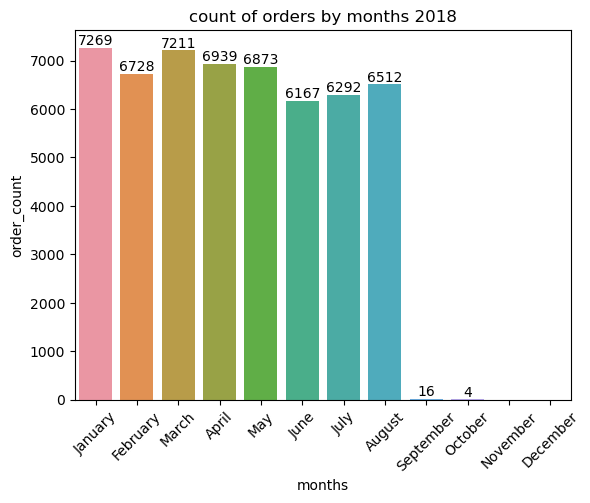

In [23]:
query2 = '''select monthname(order_purchase_timestamp) as months , count(order_id) as order_count from orders 
            where year(order_purchase_timestamp) = 2018 group by months;
'''

cursor.execute(query2)
data2 = cursor.fetchall()
df1 = pd.DataFrame(data2, columns = ["months", "order_count"])
m = ["January", "February", "March", "April", "May", "June", "July", "August", 
     "September", "October", "November", "December"]
ax = sns.barplot(x = df1["months"], y = df1["order_count"], data = df1 , order = m)
plt.xticks(rotation = 45)
plt.title("count of orders by months 2018")
ax.bar_label(ax.containers[0])
plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [28]:
query2 = '''with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc 
from orders join order_items 
on orders.order_id = order_items.order_id 
group by orders.order_id, orders.customer_id) 

select customer.customer_city, round(avg(count_per_order.oc),2) as avg_per_orders 
from customer join count_per_order 
on customer.customer_id = count_per_order.customer_id 
group by customer.customer_city;
'''

cursor.execute(query2)
data3 = cursor.fetchall()
df = pd.DataFrame(data3, columns= ["city","avg_per_order"])
df

,city,avg_per_order
0,sao jose dos campos,1.14
1,indaial,1.12
2,treze tilias,1.27
3,sao paulo,1.16
4,rio de janeiro,1.15
...,...,...
4105,buriti,3.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [30]:
query2 = '''SELECT 
    products.product_category,
    ROUND((SUM(payments.payment_value) / (SELECT 
                    SUM(payment_value)
                FROM
                    payments)) * 100,
            2) AS sales_of_percentage
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category
ORDER BY sales_of_percentage DESC;
'''

cursor.execute(query2)
data4 = cursor.fetchall()
df = pd.DataFrame(data4, columns= ["product_category", "sales_of_percentage"])
df.head(10)

,product_category,sales_of_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


# 4. Identify the correlation between product price and the number of times a product has been purchased.


In [37]:
query2 = '''SELECT 
    products.product_category,
    COUNT(order_items.product_id) AS count_of_orders,
    round(avg(order_items.price),2) as avg_of_price
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
GROUP BY product_category;
'''

cursor.execute(query2)
data5 = cursor.fetchall()
df = pd.DataFrame(data5, columns= ["product_category", "count_of_order", "avg_of_price"])
df.head(10)

,product_category,count_of_order,avg_of_price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
5,housewares,6964,90.79
6,electronics,2767,57.91
7,None,1603,112.00
8,toys,4117,117.55
9,bed table bath,11115,93.30


In [40]:
ar1 = df["count_of_order"]
ar2 = df["avg_of_price"]
a = np.corrcoef([ar1, ar2])

In [41]:
print("the correlation between price and number of time a product has been purchased is :",a)

the correlation between price and number of time a product has been purchased is : [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


In [45]:
query2 = '''select * , dense_rank() over(order by revenue desc) as rn from 
(SELECT 
    order_items.seller_id, SUM(payments.payment_value) as revenue
FROM
    order_items
        JOIN
    payments ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id) as a;
'''
cursor.execute(query2)
data6 = cursor.fetchall()
df = pd.DataFrame(data6, columns=["seller_id", "revenue", "ranking"])
df=df.head()

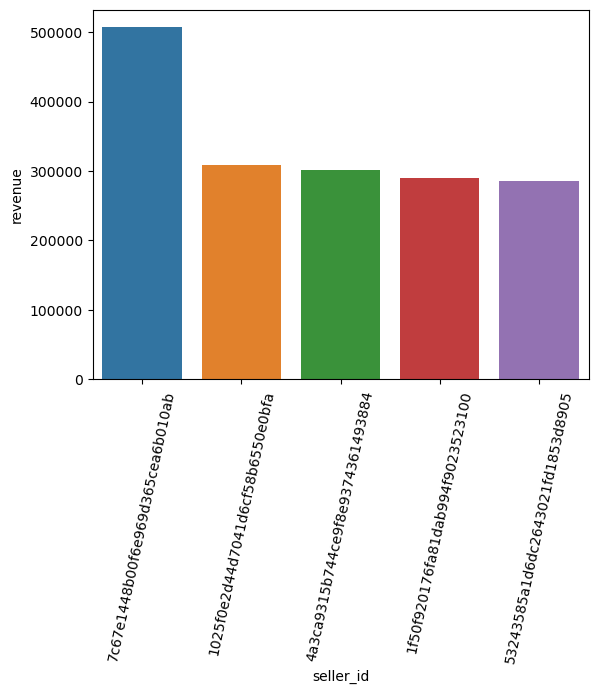

In [50]:
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 78)
plt.show()

# Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [56]:
query2 = '''select customer_id, order_purchase_timestamp, payment, 
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)as mov_avg 
from 
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders 
on payments.order_id = orders.order_id) as a;

'''
cursor.execute(query2)
data8 = cursor.fetchall()
df = pd.DataFrame(data8, columns= ["customer_id", "order_purchase_timestamp", "moving_avrage","payment"])
df.head()

,customer_id,order_purchase_timestamp,moving_avrage,payment
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


# 2. Calculate the cumulative sales per month for each year.

In [64]:
query2 = '''select years, months, total_payment, sum(total_payment) over(order by years, months) cumulative_sales
 from 
 (SELECT YEAR(orders.order_purchase_timestamp) AS years,
    MONTH(orders.order_purchase_timestamp) AS months,
    round(SUM(payments.payment_value),2) AS total_payment
FROM
    orders
        JOIN
    payments ON orders.order_id = payments.order_id
GROUP BY years , months
ORDER BY years , months) as a;


'''
cursor.execute(query2)
data9 = cursor.fetchall()
df = pd.DataFrame(data9, columns= ["years", "months", "total_payments", "cumulative_sales"])
df

,years,months,total_payments,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 3. Calculate the year-over-year growth rate of total sales.

In [72]:
query2 = ''' with a as (SELECT 
    YEAR(order_purchase_timestamp) AS years,
    round(SUM(payments.payment_value),2) AS total_sales
FROM
    orders
        JOIN
    payments ON orders.order_id = payments.order_id
GROUP BY years order by years)

select years, total_sales, lag(total_sales, 1) over (order by years) as previous_year from a; 
'''
cursor.execute(query2)
data7 = cursor.fetchall()
df= pd.DataFrame(data7, columns= ["years", "total_sales", "previous_year"])
df

,years,total_sales,previous_year
0,2016,59362.34,NaN
1,2017,7249746.73,59362.34
2,2018,8699763.05,7249746.73


In [73]:
query2 = ''' with a as (SELECT 
    YEAR(order_purchase_timestamp) AS years,
    round(SUM(payments.payment_value),2) AS total_sales
FROM
    orders
        JOIN
    payments ON orders.order_id = payments.order_id
GROUP BY years order by years)

select years, ((total_sales - lag(total_sales, 1) over (order by years)) / lag(total_sales, 1) over (order by years)) *100 from a; 
'''
cursor.execute(query2)
data8 = cursor.fetchall()
df= pd.DataFrame(data8, columns= ["years", "YOY % growth"])
df

,years,YOY % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [74]:
query2 = ''' with a as (select customer.customer_id, min(orders.order_purchase_timestamp) as min_purchase 
from customer join orders on customer.customer_id = orders.customer_id 
group by customer.customer_id), 
b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from 
a join orders on orders.customer_id = a.customer_id 
and orders.order_purchase_timestamp > min_purchase 
and orders.order_purchase_timestamp < date_add(min_purchase, interval 6 month) group by a.customer_id)

select 100 * (count( distinct a.customer_id) / count(distinct b.customer_id)) from a left join b on a.customer_id = b.customer_id;
'''
cursor.execute(query2)
data9 = cursor.fetchall()
data9

[(None,)]

# 5. Identify the top 3 customers who spent the most money in each year.

In [77]:
query2 = '''  select years, customer_id, payment, ranks 
 from (select year(orders.order_purchase_timestamp) as years, 
 orders.customer_id, sum(payments.payment_value) as payment , 
 dense_rank() over(partition by year(orders.order_purchase_timestamp) 
 order by sum(payments.payment_value )desc) as ranks 
 from orders join payments 
 on orders.order_id = payments.order_id 
 group by years, orders.customer_id) as a 
 where ranks <=3;
    
'''
cursor.execute(query2)
data9 = cursor.fetchall()
df = pd.DataFrame(data9, columns=["years", "customer_id", "payment", "ranks"])
df

,years,customer_id,payment,ranks
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


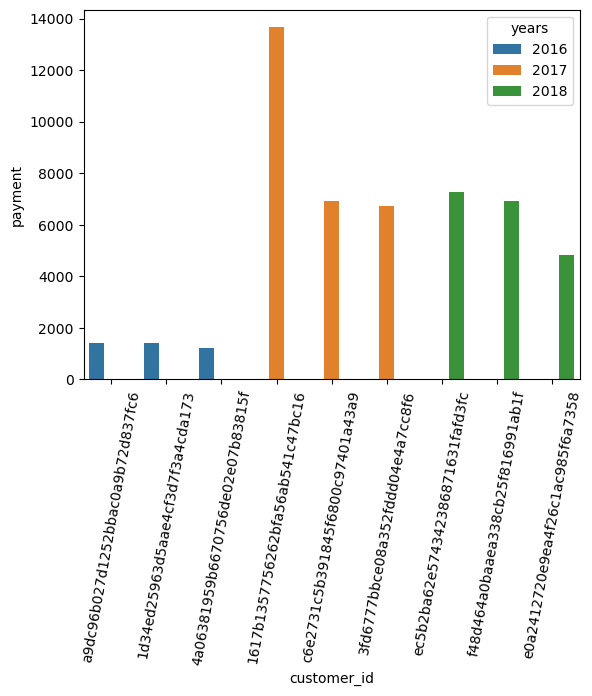

In [80]:
sns.barplot(x="customer_id", y="payment", data = df , hue="years")
plt.xticks(rotation = 80)
plt.show()